# Recap - Computer Vision

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

## Dataset

This Dataset contains about 5000 pictures of cats and dogs (4000 for training and 1000 for testing). Each category will be in a separated folder, `cat-and-dog/training_set/` and `cat-and-dog/test_set` and then in sub folders `cats` and `dogs`.

In [ ]:
!curl "https://wagon-public-datasets.s3.amazonaws.com/deep_learning_datasets/cat-and-dog.zip" --output cat-and-dog.zip
!unzip -qn cat-and-dog.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  109M  100  109M    0     0  3621k      0  0:00:30  0:00:30 --:--:-- 3875kk      0  0:00:32  0:00:16  0:00:16 3858k


In [ ]:
!ls

README.md             cat-and-dog.zip
cat-and-dog-small     computer_vision.ipynb


In [ ]:
# Let's store the location of our data in 2 variables that we can re use later
train_data_dir = "cat-and-dog-small/training_set/"
test_data_dir = "cat-and-dog-small/test_set/"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(f"{train_data_dir}cats/cat.3.jpg")
x = img_to_array(img)/255  # We divide the pixel value by 255 to end up between 0 and 1

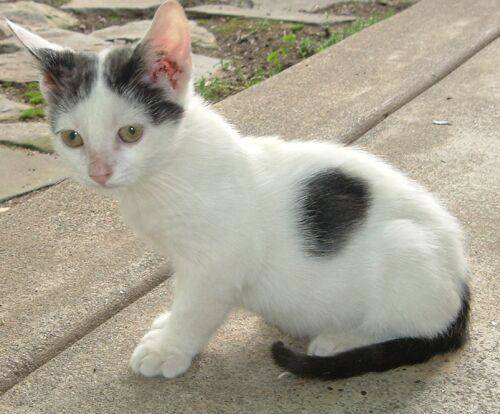

In [ ]:
img

In [ ]:
x.shape

(414, 500, 3)

### First (bad) model

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
model = Sequential()

model.add(layers.Input((150, 150, 3)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 128)     73856     
                                                                 
 flatten (Flatten)           (None, 2880000)           0         
                                                                 
 dense (Dense)               (None, 64)                184320064 
                                                                 
 dropout (Dropout)           (None, 64)                0

Here we didn't use any pooling layers which gave us a super high amount of parameters ...

### First (good) model

This time WITH pooling layers

In [ ]:
model = Sequential()

model.add(layers.Input((150, 150, 3)))
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation="sigmoid"))

# And we perform the prediction using sigmoid

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 38, 38, 64)       

With pooling layers we have drastically reduced the amount of parameters from 165,286,113 to 504,033

In [ ]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
batch_size = 64

Here, we'll create a `Tensorflow Datasets` object.
This will allow us to:


*   Grab images from our directory batch by batch, we won't load ALL the data at the same time
*   Reshape all the images to our desired input shape, 150x150 in this recap



We have to specify different things:


*   Where the data is located (that's why we saved the folder name in a variable)
*   The target size to resize our images so they fit our model
*   The Batch size
*   The "label mode", here we say binary, and the classes will be infered based on the folders name. It will chose cat = 0 and dog = 1
*   Here the labels are inferred based on the folder structure








In [ ]:
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="binary",
    seed=123,
    image_size=(150, 150),
    batch_size=batch_size)

# We define a second one for the test data

val_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="binary",
    seed=123,
    image_size=(150, 150),
    batch_size=batch_size)

Found 4004 files belonging to 2 classes.
Found 1012 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


Here we'll create our callbacks. Those functions will be called at the end of every single epoch.
We'll use:


*   `ModelCheckpoint` to save the best version of our model after every epoch
*   `ReduceLROnPlateau` to reduce the `learning_rate` if the model doesn't get better after a few epochs
*   `EarlyStopping` to stop the training after a certain time if it's not improving



In [ ]:
MODEL = "model_1"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [ ]:
%%time
history = model.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks=[modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/30


63/63 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.5952INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


63/63 [==============================] - 9s 130ms/step - loss: 0.6735 - accuracy: 0.5952 - val_loss: 0.6281 - val_accuracy: 0.6798 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.6303 - accuracy: 0.6673INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


63/63 [==============================] - 10s 148ms/step - loss: 0.6303 - accuracy: 0.6673 - val_loss: 0.5882 - val_accuracy: 0.7154 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6042 - accuracy: 0.6908INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


63/63 [==============================] - 10s 150ms/step - loss: 0.6042 - accuracy: 0.6908 - val_loss: 0.5861 - val_accuracy: 0.7026 - lr: 0.0010
Epoch 4/30
63/63 [==============================] - 9s 139ms/step - loss: 0.6117 - accuracy: 0.6916 - val_loss: 0.5949 - val_accuracy: 0.6986 - lr: 0.0010
Epoch 5/30
63/63 [==============================] - 9s 133ms/step - loss: 0.5674 - accuracy: 0.7298 - val_loss: 0.6130 - val_accuracy: 0.7144 - lr: 0.0010
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 0.6029 - accuracy: 0.7180INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


63/63 [==============================] - 11s 177ms/step - loss: 0.6029 - accuracy: 0.7180 - val_loss: 0.5669 - val_accuracy: 0.7174 - lr: 0.0010
Epoch 7/30
63/63 [==============================] - ETA: 0s - loss: 0.5612 - accuracy: 0.7335INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


63/63 [==============================] - 10s 156ms/step - loss: 0.5612 - accuracy: 0.7335 - val_loss: 0.5444 - val_accuracy: 0.7322 - lr: 0.0010
Epoch 8/30
63/63 [==============================] - 9s 133ms/step - loss: 0.5359 - accuracy: 0.7557 - val_loss: 0.6150 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 9/30
63/63 [==============================] - ETA: 0s - loss: 0.5048 - accuracy: 0.7620INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


63/63 [==============================] - 10s 154ms/step - loss: 0.5048 - accuracy: 0.7620 - val_loss: 0.5145 - val_accuracy: 0.7658 - lr: 0.0010
Epoch 10/30
63/63 [==============================] - ETA: 0s - loss: 0.4912 - accuracy: 0.7737INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


63/63 [==============================] - 9s 134ms/step - loss: 0.4912 - accuracy: 0.7737 - val_loss: 0.4984 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 11/30
63/63 [==============================] - 9s 130ms/step - loss: 0.4423 - accuracy: 0.8022 - val_loss: 0.5042 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 12/30
63/63 [==============================] - 8s 118ms/step - loss: 0.6038 - accuracy: 0.7615 - val_loss: 0.5286 - val_accuracy: 0.7767 - lr: 0.0010
Epoch 13/30
63/63 [==============================] - ETA: 0s - loss: 0.4192 - accuracy: 0.8107
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
63/63 [==============================] - 8s 121ms/step - loss: 0.4192 - accuracy: 0.8107 - val_loss: 0.5162 - val_accuracy: 0.7767 - lr: 0.0010
Epoch 14/30
63/63 [==============================] - ETA: 0s - loss: 0.3548 - accuracy: 0.8489INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


63/63 [==============================] - 12s 181ms/step - loss: 0.3548 - accuracy: 0.8489 - val_loss: 0.4843 - val_accuracy: 0.7955 - lr: 1.0000e-04
Epoch 15/30
63/63 [==============================] - 9s 130ms/step - loss: 0.3359 - accuracy: 0.8556 - val_loss: 0.5105 - val_accuracy: 0.7866 - lr: 1.0000e-04
Epoch 16/30
63/63 [==============================] - 9s 133ms/step - loss: 0.3335 - accuracy: 0.8569 - val_loss: 0.4947 - val_accuracy: 0.7964 - lr: 1.0000e-04
Epoch 17/30
63/63 [==============================] - ETA: 0s - loss: 0.3148 - accuracy: 0.8674
Epoch 17: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
63/63 [==============================] - 8s 124ms/step - loss: 0.3148 - accuracy: 0.8674 - val_loss: 0.4992 - val_accuracy: 0.8014 - lr: 1.0000e-04
Epoch 18/30
63/63 [==============================] - 9s 133ms/step - loss: 0.3081 - accuracy: 0.8689 - val_loss: 0.5070 - val_accuracy: 0.7984 - lr: 1.0000e-05
Epoch 19/30
63/63 [==============================]

In [ ]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [ ]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

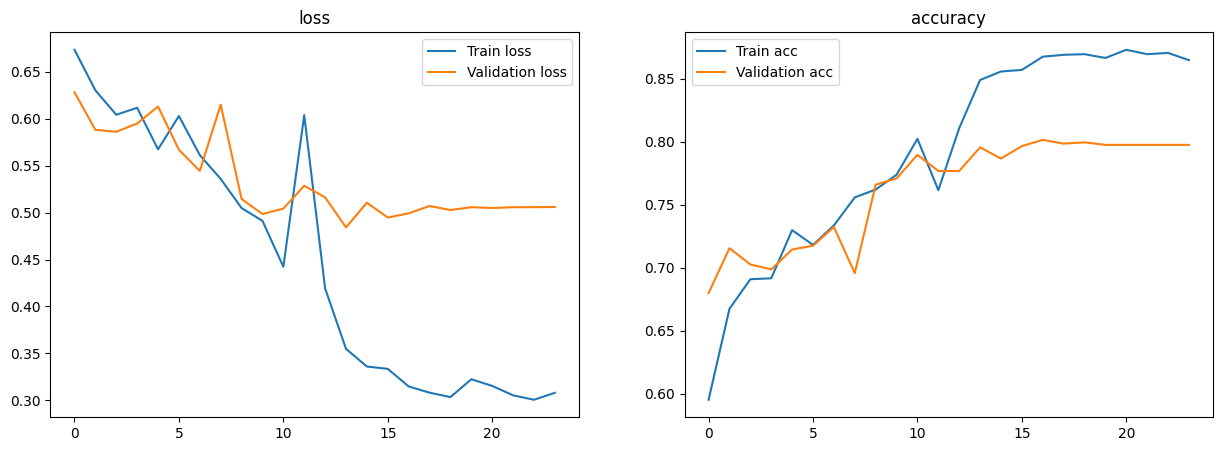

In [ ]:
plot_history(history)

## Data Augmentation

![Texte alternatif…](https://cdn-images-1.medium.com/max/1020/1*C8hNiOqur4OJyEZmC7OnzQ.png)

### Second model with Data Augmentation

In [ ]:
# We'll use a model with the same convolutional layers, but we'll add Augmentation layers before that

model_2 = Sequential()

model_2.add(layers.Input((150, 150, 3)))
model_2.add(layers.Rescaling(1./255))

# Data Augmentation Layers

model_2.add(layers.RandomFlip("horizontal"))
model_2.add(layers.RandomZoom(0.1))
model_2.add(layers.RandomTranslation(0.2, 0.2))
model_2.add(layers.RandomRotation(0.1))


# Convolutional Layers

model_2.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_2.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_2.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model_2.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model_2.add(layers.Flatten())

model_2.add(layers.Dense(64, activation="relu"))

model_2.add(layers.Dropout(0.5))

model_2.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_zoom_3 (RandomZoom)  (None, 150, 150, 3)       0         
                                                                 
 random_translation_3 (Rand  (None, 150, 150, 3)       0         
 omTranslation)                                                  
                                                                 
 random_rotation_3 (RandomR  (None, 150, 150, 3)       0         
 otation)                                                        
                                                                 
 conv2d_20 (Conv2D)          (None, 150, 150, 32)     

In [ ]:
adam = optimizers.Adam(learning_rate=0.001)

model_2.compile(loss='binary_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

In [ ]:
MODEL = "model_2"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [ ]:
%%time
history_2 = model_2.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.6978 - accuracy: 0.5032INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 15s 215ms/step - loss: 0.6978 - accuracy: 0.5032 - val_loss: 0.6880 - val_accuracy: 0.5099 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5529INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 13s 206ms/step - loss: 0.6858 - accuracy: 0.5529 - val_loss: 0.6529 - val_accuracy: 0.6413 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - 12s 189ms/step - loss: 0.6888 - accuracy: 0.5714 - val_loss: 0.6772 - val_accuracy: 0.5800 - lr: 0.0010
Epoch 4/30
63/63 [==============================] - 13s 195ms/step - loss: 0.6853 - accuracy: 0.5699 - val_loss: 0.6716 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 5/30
63/63 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.5832
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
63/63 [==============================] - 13s 197ms/step - loss: 0.6783 - accuracy: 0.5832 - val_loss: 0.6604 - val_accuracy: 0.6630 - lr: 0.0010
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 0.6628 - accuracy: 0.6224INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 13s 202ms/step - loss: 0.6628 - accuracy: 0.6224 - val_loss: 0.6448 - val_accuracy: 0.6690 - lr: 1.0000e-04
Epoch 7/30
63/63 [==============================] - ETA: 0s - loss: 0.6475 - accuracy: 0.6449INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 13s 206ms/step - loss: 0.6475 - accuracy: 0.6449 - val_loss: 0.6281 - val_accuracy: 0.6719 - lr: 1.0000e-04
Epoch 8/30
63/63 [==============================] - ETA: 0s - loss: 0.6413 - accuracy: 0.6454INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 13s 206ms/step - loss: 0.6413 - accuracy: 0.6454 - val_loss: 0.6258 - val_accuracy: 0.6502 - lr: 1.0000e-04
Epoch 9/30
63/63 [==============================] - ETA: 0s - loss: 0.6318 - accuracy: 0.6543INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 13s 204ms/step - loss: 0.6318 - accuracy: 0.6543 - val_loss: 0.6132 - val_accuracy: 0.6749 - lr: 1.0000e-04
Epoch 10/30
63/63 [==============================] - ETA: 0s - loss: 0.6422 - accuracy: 0.6508INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 15s 226ms/step - loss: 0.6422 - accuracy: 0.6508 - val_loss: 0.6102 - val_accuracy: 0.6709 - lr: 1.0000e-04
Epoch 11/30
63/63 [==============================] - ETA: 0s - loss: 0.6245 - accuracy: 0.6601INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 13s 204ms/step - loss: 0.6245 - accuracy: 0.6601 - val_loss: 0.6034 - val_accuracy: 0.6779 - lr: 1.0000e-04
Epoch 12/30
63/63 [==============================] - 12s 188ms/step - loss: 0.6270 - accuracy: 0.6666 - val_loss: 0.6196 - val_accuracy: 0.6551 - lr: 1.0000e-04
Epoch 13/30
63/63 [==============================] - 12s 187ms/step - loss: 0.6306 - accuracy: 0.6606 - val_loss: 0.6038 - val_accuracy: 0.6700 - lr: 1.0000e-04
Epoch 14/30
63/63 [==============================] - ETA: 0s - loss: 0.6253 - accuracy: 0.6701
Epoch 14: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
63/63 [==============================] - 13s 197ms/step - loss: 0.6253 - accuracy: 0.6701 - val_loss: 0.6233 - val_accuracy: 0.6601 - lr: 1.0000e-04
Epoch 15/30
63/63 [==============================] - ETA: 0s - loss: 0.6308 - accuracy: 0.6681INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 13s 208ms/step - loss: 0.6308 - accuracy: 0.6681 - val_loss: 0.5961 - val_accuracy: 0.6897 - lr: 1.0000e-05
Epoch 16/30
63/63 [==============================] - ETA: 0s - loss: 0.6269 - accuracy: 0.6651INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 15s 227ms/step - loss: 0.6269 - accuracy: 0.6651 - val_loss: 0.5930 - val_accuracy: 0.6907 - lr: 1.0000e-05
Epoch 17/30
63/63 [==============================] - ETA: 0s - loss: 0.6265 - accuracy: 0.6633INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


63/63 [==============================] - 20s 311ms/step - loss: 0.6265 - accuracy: 0.6633 - val_loss: 0.5892 - val_accuracy: 0.6996 - lr: 1.0000e-05
Epoch 18/30
63/63 [==============================] - 20s 304ms/step - loss: 0.6297 - accuracy: 0.6726 - val_loss: 0.5902 - val_accuracy: 0.6927 - lr: 1.0000e-05
Epoch 19/30
63/63 [==============================] - 15s 232ms/step - loss: 0.6208 - accuracy: 0.6748 - val_loss: 0.5929 - val_accuracy: 0.6907 - lr: 1.0000e-05
Epoch 20/30
63/63 [==============================] - ETA: 0s - loss: 0.6207 - accuracy: 0.6806
Epoch 20: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
63/63 [==============================] - 16s 243ms/step - loss: 0.6207 - accuracy: 0.6806 - val_loss: 0.5901 - val_accuracy: 0.6927 - lr: 1.0000e-05
Epoch 21/30
63/63 [==============================] - 14s 219ms/step - loss: 0.6284 - accuracy: 0.6678 - val_loss: 0.5903 - val_accuracy: 0.6927 - lr: 1.0000e-06
Epoch 22/30
63/63 [===========================

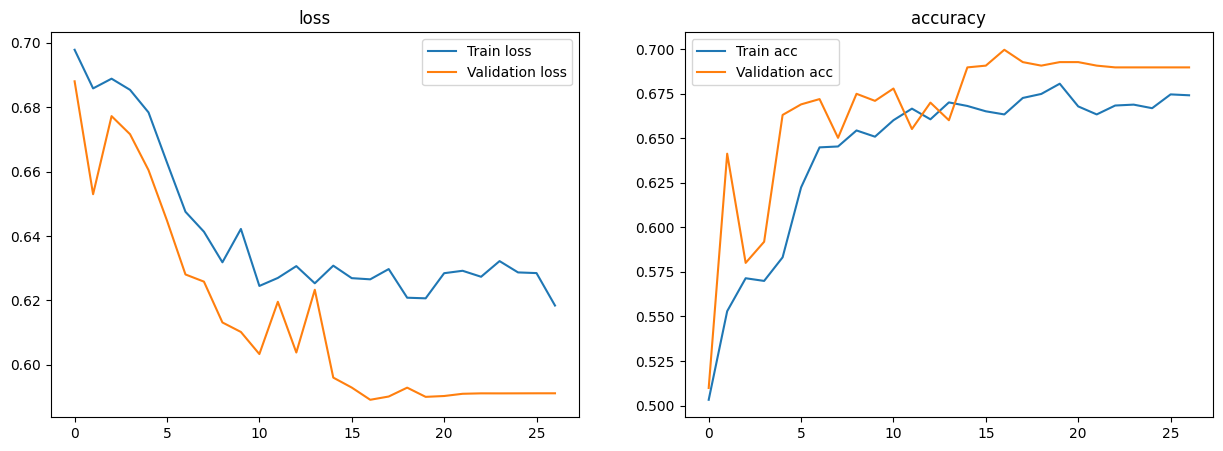

In [ ]:
plot_history(history_2)

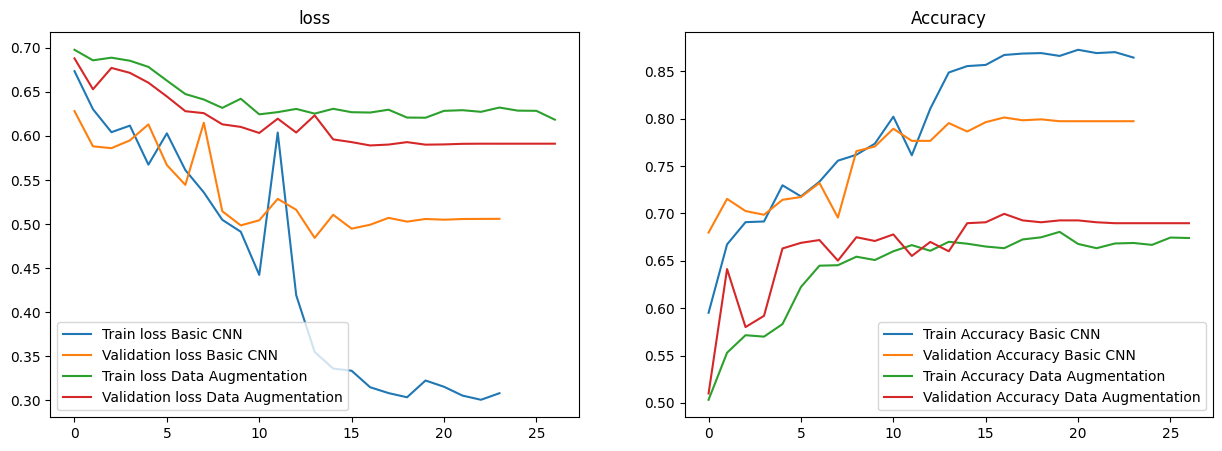

In [ ]:
plot_compare_history(history, "Basic CNN", history_2, "Data Augmentation")

## Transfer Learning

![Texte alternatif…](https://cdn-images-1.medium.com/max/1600/1*9GTEzcO8KxxrfutmtsPs3Q.png)

![Texte alternatif…](https://www.researchgate.net/profile/Francesco-Orabona/publication/221363182/figure/fig1/AS:276504308142080@1442935172550/Three-ways-in-which-transfer-might-improve-learning-19.png)

### Third model with Transfer Learning and Data Augmentation

In [ ]:
data_augmentation = Sequential()

data_augmentation.add(layers.RandomFlip("horizontal"))
data_augmentation.add(layers.RandomZoom(0.1))
data_augmentation.add(layers.RandomTranslation(0.2, 0.2))
data_augmentation.add(layers.RandomRotation(0.1))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

In [ ]:
# First step is to initialize the VGG16 model but without the top as we'll adapt it to our problem
inputs = layers.Input(shape=(150, 150, 3))

x = data_augmentation(inputs) # We still have our data augmentation layers
x = preprocess_input(x) # Then a preprocessing layer specifically designed for the VGG16
x = base_model(x) # Then our transfer learning model

x = layers.Flatten()(x) # Followed by our custom dense layers, tailored to our binary task

x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
pred = layers.Dense(1, activation="sigmoid")(x)

# We use the keras Functional API to create our keras model

model_3 = Model(inputs=inputs , outputs=pred)

# And we freeze the VGG16 model

base_model.trainable = False

# for layer in base_model.layers[:10]:
#     layer.trainable = False

In [ ]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 150, 150, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 150, 150, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0     

In [ ]:
adam = optimizers.Adam(learning_rate=0.001)
model_3.compile(loss='binary_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

In [ ]:
MODEL = "model_3"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [ ]:
%%time
history_3 = model_3.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 7.3272 - accuracy: 0.8569INFO:tensorflow:Assets written to: model_3/assets


INFO:tensorflow:Assets written to: model_3/assets


63/63 [==============================] - 49s 747ms/step - loss: 7.3272 - accuracy: 0.8569 - val_loss: 2.7087 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - 47s 737ms/step - loss: 5.7618 - accuracy: 0.9123 - val_loss: 2.7568 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 5.0096 - accuracy: 0.9141INFO:tensorflow:Assets written to: model_3/assets


INFO:tensorflow:Assets written to: model_3/assets


63/63 [==============================] - 53s 830ms/step - loss: 5.0096 - accuracy: 0.9141 - val_loss: 2.4539 - val_accuracy: 0.9723 - lr: 0.0010
Epoch 4/30
63/63 [==============================] - 57s 902ms/step - loss: 5.4432 - accuracy: 0.9156 - val_loss: 3.9869 - val_accuracy: 0.9615 - lr: 0.0010
Epoch 5/30
63/63 [==============================] - 54s 844ms/step - loss: 4.2034 - accuracy: 0.9238 - val_loss: 2.6892 - val_accuracy: 0.9733 - lr: 0.0010
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 4.7509 - accuracy: 0.9218
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
63/63 [==============================] - 64s 1s/step - loss: 4.7509 - accuracy: 0.9218 - val_loss: 2.6027 - val_accuracy: 0.9713 - lr: 0.0010
Epoch 7/30
63/63 [==============================] - 58s 913ms/step - loss: 4.4091 - accuracy: 0.9198 - val_loss: 2.6479 - val_accuracy: 0.9723 - lr: 1.0000e-04
Epoch 8/30
63/63 [==============================] - ETA: 0s - loss: 3.

INFO:tensorflow:Assets written to: model_3/assets


63/63 [==============================] - 73s 1s/step - loss: 3.5804 - accuracy: 0.9313 - val_loss: 2.3900 - val_accuracy: 0.9753 - lr: 1.0000e-04
Epoch 9/30
63/63 [==============================] - 60s 937ms/step - loss: 3.8422 - accuracy: 0.9278 - val_loss: 2.4098 - val_accuracy: 0.9753 - lr: 1.0000e-04
Epoch 10/30
63/63 [==============================] - 60s 945ms/step - loss: 3.4980 - accuracy: 0.9356 - val_loss: 2.4906 - val_accuracy: 0.9733 - lr: 1.0000e-04
Epoch 11/30
63/63 [==============================] - ETA: 0s - loss: 3.2433 - accuracy: 0.9383INFO:tensorflow:Assets written to: model_3/assets


INFO:tensorflow:Assets written to: model_3/assets


63/63 [==============================] - 61s 966ms/step - loss: 3.2433 - accuracy: 0.9383 - val_loss: 2.2731 - val_accuracy: 0.9773 - lr: 1.0000e-04
Epoch 12/30
63/63 [==============================] - ETA: 0s - loss: 3.5384 - accuracy: 0.9283INFO:tensorflow:Assets written to: model_3/assets


INFO:tensorflow:Assets written to: model_3/assets


63/63 [==============================] - 62s 987ms/step - loss: 3.5384 - accuracy: 0.9283 - val_loss: 2.1781 - val_accuracy: 0.9773 - lr: 1.0000e-04
Epoch 13/30
63/63 [==============================] - 63s 992ms/step - loss: 3.2656 - accuracy: 0.9313 - val_loss: 2.2461 - val_accuracy: 0.9783 - lr: 1.0000e-04
Epoch 14/30
63/63 [==============================] - 63s 981ms/step - loss: 2.9451 - accuracy: 0.9401 - val_loss: 2.4172 - val_accuracy: 0.9743 - lr: 1.0000e-04
Epoch 15/30
63/63 [==============================] - ETA: 0s - loss: 2.7633 - accuracy: 0.9396
Epoch 15: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
63/63 [==============================] - 66s 1s/step - loss: 2.7633 - accuracy: 0.9396 - val_loss: 2.4290 - val_accuracy: 0.9743 - lr: 1.0000e-04
Epoch 16/30
63/63 [==============================] - 63s 1s/step - loss: 2.7321 - accuracy: 0.9416 - val_loss: 2.3341 - val_accuracy: 0.9733 - lr: 1.0000e-05
Epoch 17/30
63/63 [==============================] -

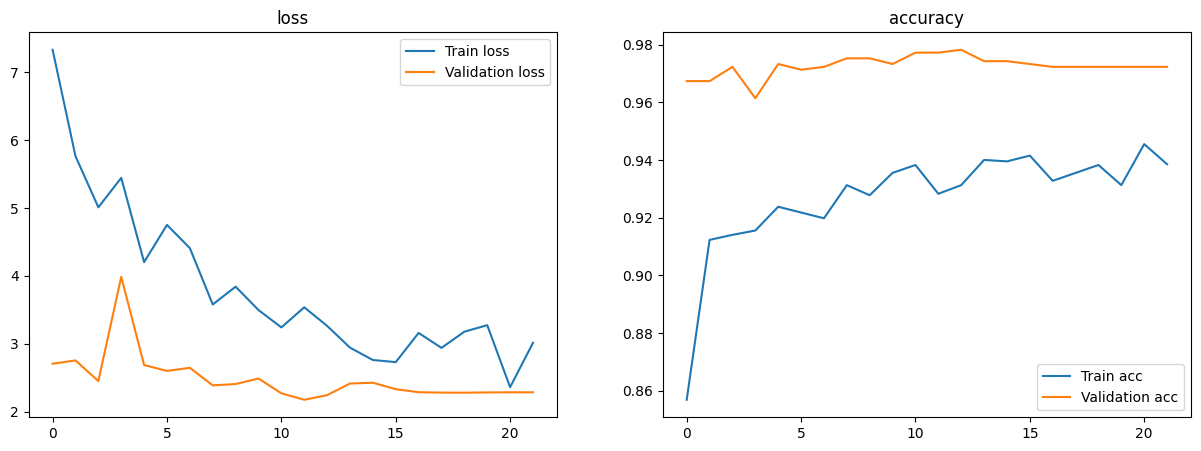

In [ ]:
plot_history(history_3)

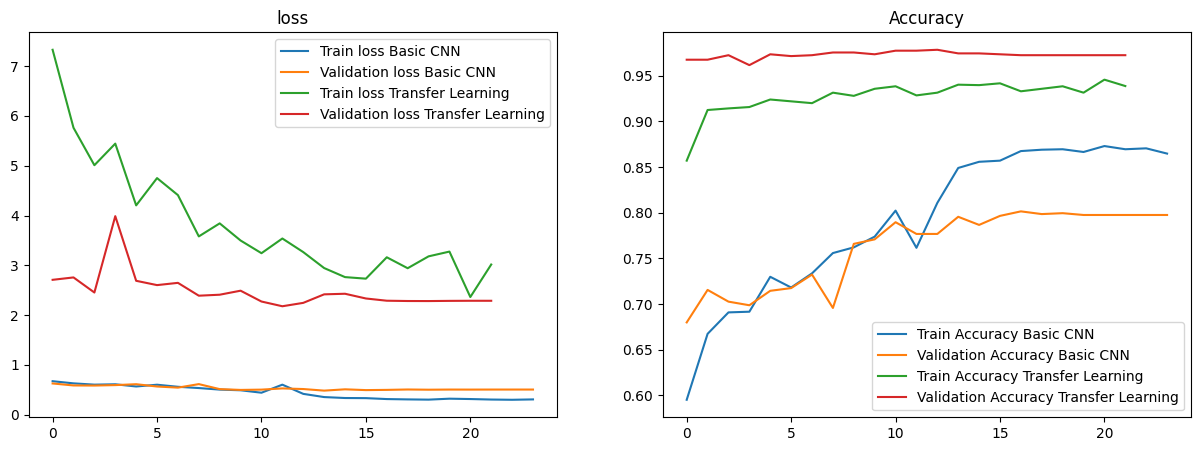

In [ ]:
plot_compare_history(history, "Basic CNN", history_3, "Transfer Learning")

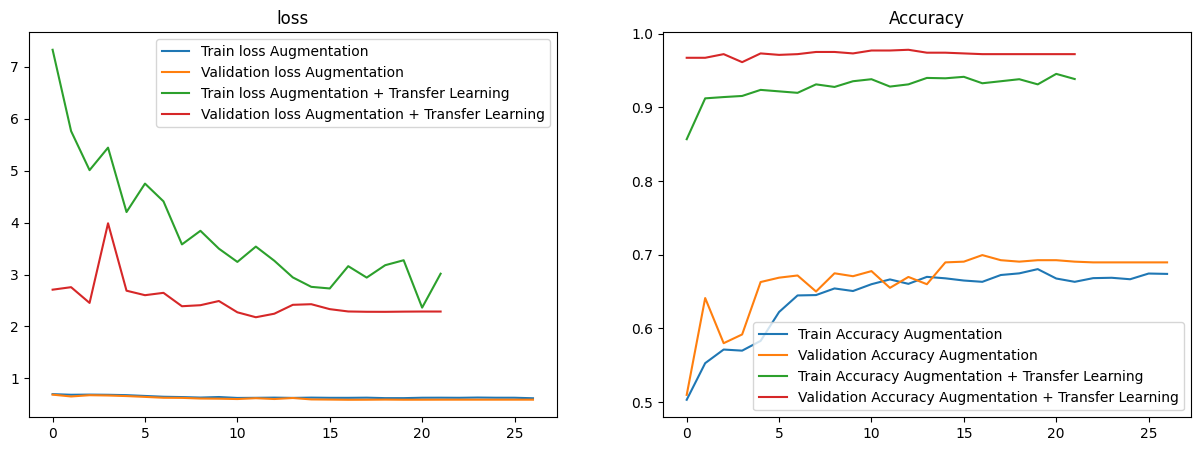

In [ ]:
plot_compare_history(history_2, "Augmentation", history_3, "Augmentation + Transfer Learning")

## Save and use the model

In [ ]:
model_3.save("model_3")

INFO:tensorflow:Assets written to: model_3/assets


INFO:tensorflow:Assets written to: model_3/assets


In [ ]:
from tensorflow.keras.models import load_model

model_3 = load_model("model_3")

In [ ]:
from PIL import Image
import requests
from io import BytesIO

def getImage(url):
    '''Grabs an image based on its URL, and resize it
    '''
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    img = img.resize((150, 150))
    return img

def predictImage(url, model):
    '''Takes an image and a model
    '''
    img = getImage(url)
    img = img_to_array(img)
    img = img.reshape((-1, 150, 150, 3))
    res = model.predict(img)[0][0]
    if(res < 0.5):
        animal = "cat"
        prob = 1-res
    if(res >= 0.5):
        animal = "dog"
        prob = res

    print("Animal : ", animal)
    print("probability = ",prob)

In [ ]:
cat = "https://www.wikichat.fr/wp-content/uploads/sites/2/comment-soigner-une-plaie-dun-chat.jpg"
cat2 = "http://create.votreveterinaire.com/adm/webmaster/_empty/upload/chat_surpris.jpg"


dog = "https://images.sudouest.fr/2018/04/14/5ace461a66a4bd2b1780a0dd/widescreen/1000x500/on-ignore-si-le-chihuahua-a-deserte-ou-non-les-locaux-de-la-clinique.jpg?v1"
dog2 = "https://ds1.static.rtbf.be/article/image/370x208/7/8/f/a20f02dfccd07952da54a7f9a82b3e89-1524657315.jpg"

1/1 [==============================] - 3s 3s/step
Animal :  cat
probability =  1.0


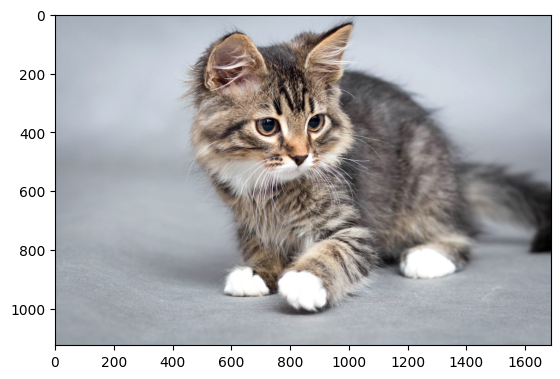

In [ ]:
predictImage(cat, model_3)

1/1 [==============================] - 0s 20ms/step
Animal :  cat
probability =  1.0


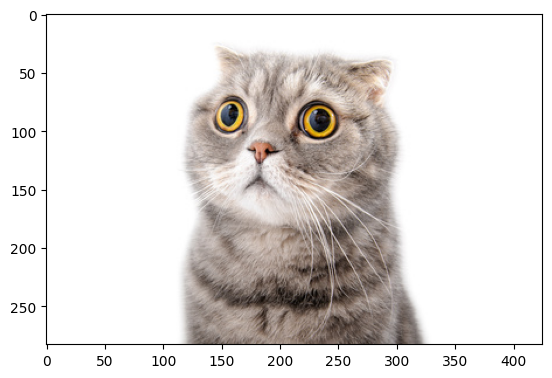

In [ ]:
predictImage(cat2, model_3)

1/1 [==============================] - 0s 19ms/step
Animal :  dog
probability =  1.0


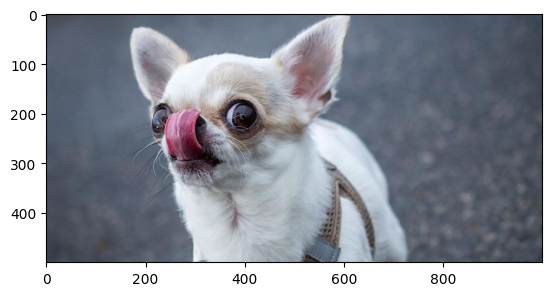

In [ ]:
predictImage(dog, model_3)

1/1 [==============================] - 0s 15ms/step
Animal :  dog
probability =  1.0


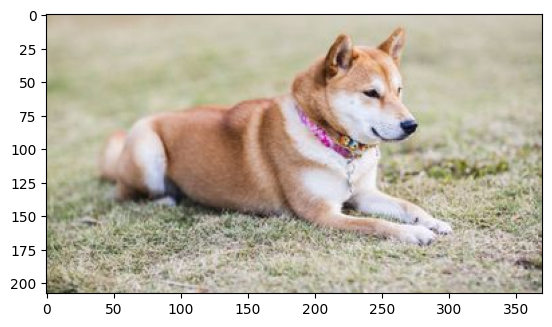

In [ ]:
predictImage(dog2, model_3)